<a href="https://colab.research.google.com/github/inwoo0206/practice_py/blob/main/openai_1202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install openai==0.28

In [3]:
import openai

OPENAI_API_KEY = ""

openai.api_key = OPENAI_API_KEY

In [4]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

color_words = ["red", "blue","yellow","green","violet","cyan","black","white"]

In [2]:
import openai
import numpy as np

OPENAI_API_KEY = ""

openai.api_key = OPENAI_API_KEY

def get_embeddings(words):
    response = openai.Embedding.create(
        input=words,
        model="text-embedding-ada-002"
    )
    return np.array([data["embedding"] for data in response["data"]])

color_words = ["red", "blue", "yellow", "green", "violet", "cyan", "black", "white"]

color_embeddings = get_embeddings(color_words)

print(color_embeddings)
print(color_embeddings.shape)


[[ 9.32653347e-06 -2.47681402e-02 -2.38425098e-03 ... -1.35402735e-02
  -1.94616374e-02 -2.33412650e-03]
 [ 5.47496416e-03 -7.48624606e-03  5.67850750e-03 ... -1.05083436e-02
  -1.13984132e-02 -6.72727183e-04]
 [ 7.66185811e-03 -2.49109976e-02  4.49154852e-03 ... -1.49784684e-02
  -3.78777320e-03  3.69814131e-03]
 ...
 [ 2.15506330e-02 -1.40106883e-02  8.28977302e-03 ... -1.30039742e-02
  -4.20737220e-03  6.06198329e-04]
 [-1.51030822e-02 -3.12157646e-02  8.77943356e-03 ... -7.02627562e-03
  -8.10409337e-03 -1.47483572e-02]
 [ 6.29211031e-03 -2.45711766e-02  2.02813782e-04 ... -2.47656349e-02
   2.86999415e-03 -2.11820491e-02]]
(8, 1536)


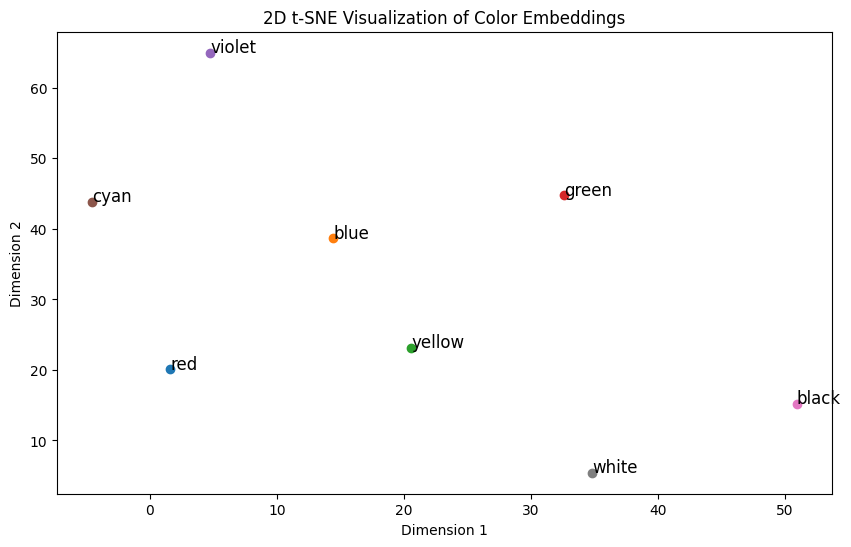

In [5]:
import openai
import numpy as np
from sklearn.manifold import TSNE # Import the TSNE class here
import matplotlib.pyplot as plt


OPENAI_API_KEY = ""

openai.api_key = OPENAI_API_KEY

# Now you can use TSNE
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
color_embeddings_2d = tsne.fit_transform(color_embeddings)

plt.figure(figsize=(10, 6))
for i, color in enumerate(color_words):
    plt.scatter(color_embeddings_2d[i, 0], color_embeddings_2d[i, 1])
    plt.text(color_embeddings_2d[i, 0] + 0.02, color_embeddings_2d[i, 1] + 0.02, color, fontsize=12) # Changed word to color

plt.title('2D t-SNE Visualization of Color Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [6]:
import openai
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

OPENAI_API_KEY = ""

openai.api_key = OPENAI_API_KEY

def get_embeddings(texts, model="text-embedding-ada-002"):
    response = openai.Embedding.create(
        input=texts,
        model=model
    )
    return np.array([data["embedding"] for data in response["data"]])

documents = [
    "The ocean is blue.",
    "The sun is bright.",
    "The sky I fell in love with is rarely bule."
]

document_embeddings = get_embeddings(documents)

In [7]:
def find_most_similar(query, documents, document_embeddings):
    query_embedding = get_embeddings([query])[0]
    similarities = cosine_similarity([query_embedding], document_embeddings)
    most_similar_index = np.argmax(similarities)
    return documents[most_similar_index], similarities[0][most_similar_index]

query = "The sky is blue"
most_similar_document, similarity = find_most_similar(query, documents, document_embeddings)
print(f"Query: {query}")
print(f"Most Similar Document: {most_similar_document}")
print(f"Similarity: {similarity}")

Query: The sky is blue
Most Similar Document: The ocean is blue.
Similarity: 0.9032756723261374


In [2]:
import openai
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

OPENAI_API_KEY = ""

openai.api_key = OPENAI_API_KEY


In [3]:
def get_embeddings(texts, model="text-embedding-ada-002"):
    response = openai.Embedding.create(
        input=texts,
        model=model
    )
    return np.array([data["embedding"] for data in response["data"]])
reviews = [
    "I loved this movie! It was fantastic.",
    "The film was terrible, I hated it.",
    "What an amazing movie, had a great time watching it.",
    "The movie was a complete waste of time, very boring.",
    "Absolutely wonderful! A must-watch.",
    "Awful film. Will never watch it again."
]
labels = [1,0,1,0,1,0]
review_embeddings = get_embeddings(reviews)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(review_embeddings, labels, test_size=0.2, random_state=42)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy : {accuracy:.2f}")

Accuracy : 1.00


In [6]:
def classify_review(review):
  review_embedding = get_embeddings([review])[0]
  prediction = classifier.predict([review_embedding])[0]
  return "Positive" if prediction == 1 else "Negative"

new_review = "The movie was fantastic and very entertaining"
classfication = classify_review(new_review)
print(f"Review: {new_review}")
print(f"Classification: {classfication}")

Review: The movie was fantastic and very entertaining
Classification: Positive
